In [194]:
#TASK 1 - Install matplotlib and deap
#- Import all necessary libraries
!pip install matplotlib deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [195]:
# TODO: Task 2 - Define the number of locations and vehicles
import random
num_locations = 10
locations=[]
for i in range(num_locations):
  locations.append((random.randint(0, 100), random.randint(0, 100)))
print(locations)

depot = (50,50)

num_vehicles = 3

[(7, 98), (3, 0), (72, 67), (43, 34), (44, 7), (52, 81), (76, 26), (43, 80), (60, 51), (30, 85)]


In [196]:
# TASK 3 - Genetic Algorithm Setup
       # - Figure out how to represent an individual OR encode an individual

creator.create("FitnessMin",base.Fitness, weights=(-1.0,-1.0))
creator.create("Individual", list, fitness=creator.FitnessMin )

In [197]:
#TASK 4 - Starting with the toolbox and tools
toolbox=base.Toolbox()
toolbox.register("indices",random.sample,range(num_locations),num_locations)
toolbox.register("individual",tools.initIterate,creator.Individual,toolbox.indices)
toolbox.register("population",tools.initRepeat,list,toolbox.individual)

In [198]:
# Fitness Function
def evalVRP(individual):
    total_distance = 0
    distances = []  # Track distance traveled by each vehicle for balance calculation
    # Split the list of locations among vehicles, ensuring each starts and ends at the depot
    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        # Calculate total distance traveled by this vehicle
        vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)  # Use standard deviation of distances as a penalty for imbalance among vehicles
    return total_distance, balance_penalty
print(evalVRP([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
toolbox.register("evaluate", evalVRP)

(594.2965847695403, 79.85162202299946)


In [199]:
toolbox.register("mate", tools.cxPartialyMatched)  # Register the crossover function suitable for permutation-based representation
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)  # Register the mutation function to shuffle indices with a 5% chance per index
toolbox.register("select", tools.selTournament, tournsize=3)  # Register the selection function using tournament selection
toolbox.register("evaluate",evalVRP)

In [200]:
def plot_routes(individual, title="Routes"):
    # Define colors for different vehicles
    colors = ['r', 'g', 'b', 'y', 'm', 'c']  # Add more colors if needed
    depot_x, depot_y = depot  # Coordinates of the depot

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.grid(True)

    # Plot the depot
    plt.scatter(depot_x, depot_y, c='black', s=100, label="Depot", zorder=5)

    # Plot routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        x_coords = [point[0] for point in vehicle_route]
        y_coords = [point[1] for point in vehicle_route]

        # Plot the route
        plt.plot(x_coords, y_coords, color=colors[i % len(colors)], label=f"Vehicle {i + 1}")

        # Plot the locations on the route
        plt.scatter(x_coords, y_coords, color=colors[i % len(colors)], s=50, zorder=5)

        # Annotate the points with their indices
        for idx, (x, y) in enumerate(vehicle_route):
            if idx == 0 or idx == len(vehicle_route) - 1:  # Depot
                plt.annotate("Depot", (x, y), textcoords="offset points", xytext=(5, 5), ha="center")
            else:
                loc_idx = individual[(idx - 1) * num_vehicles + i] if idx - 1 < len(individual) else None
                if loc_idx is not None:
                    plt.annotate(str(loc_idx), (x, y), textcoords="offset points", xytext=(5, 5), ha="center")

    plt.legend()
    plt.show()

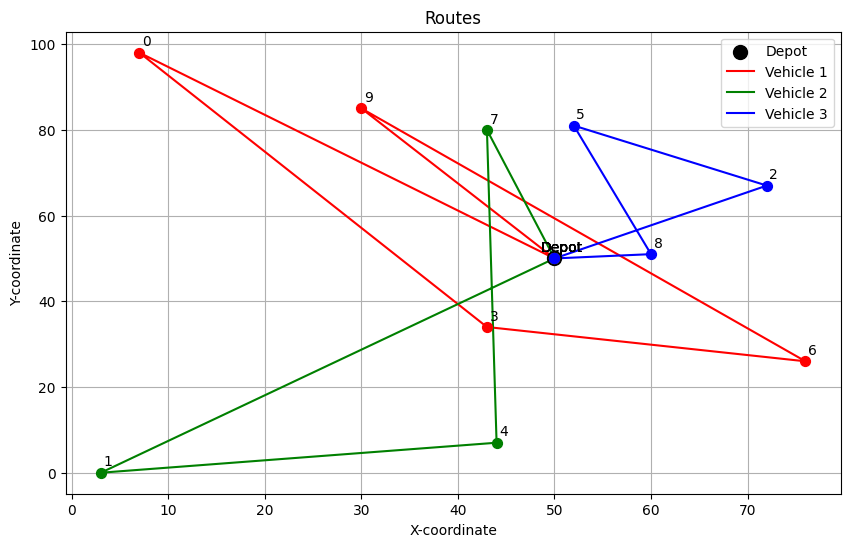

In [201]:
plot_routes([0,1,2,3,4,5,6,7,8,9])

In [202]:
# SOLUTION - TASK 8
def plot_routes1(individual, title="Routes"):
    plt.figure()
    # Plot locations as blue dots and the depot as a red square
    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    # Draw routes for each vehicle
    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        plt.plot(*zip(*vehicle_route), '-', 'rs')

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

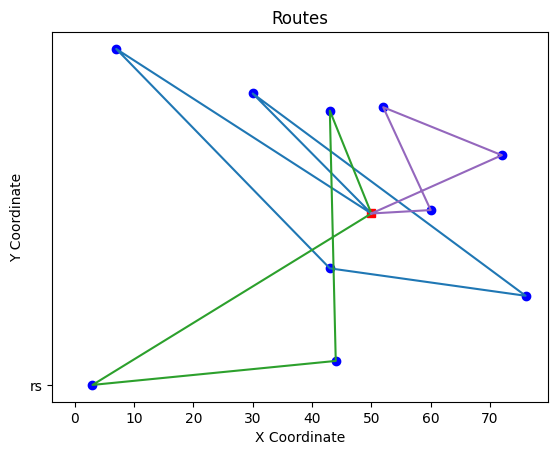

In [203]:
plot_routes1([0,1,2,3,4,5,6,7,8,9], title="Routes")

gen	nevals	avg    	min    
0  	300   	324.607	6.01432
1  	220   	312.04 	1.77563
2  	240   	310.102	5.19748
3  	229   	303.57 	3.9821 
4  	228   	301.735	4.319  
5  	218   	295.551	4.319  
6  	220   	294.37 	1.68549
7  	232   	285.715	0.726548
8  	223   	280.928	2.95267 
9  	219   	263.899	3.08699 
10 	251   	260.269	1.63846 
11 	221   	249.513	1.00602 
12 	221   	245.418	5.21604 
13 	212   	242.974	11.8869 
14 	216   	242.124	9.44348 
15 	222   	243.853	6.70112 
16 	229   	237.338	6.71554 
17 	230   	234.958	10.0907 
18 	228   	230.222	6.70112 
19 	244   	224.388	5.11773 
20 	223   	220.721	11.5602 
21 	222   	219.4  	5.11773 
22 	223   	218.13 	12.4147 
23 	218   	217.785	10.8706 
24 	240   	218.14 	5.11773 
25 	227   	217.848	12.4147 
26 	235   	216.572	17.8647 
27 	235   	219.562	15.7573 
28 	235   	217.775	11.5602 
29 	240   	218.568	5.11773 
30 	235   	216.965	5.45619 


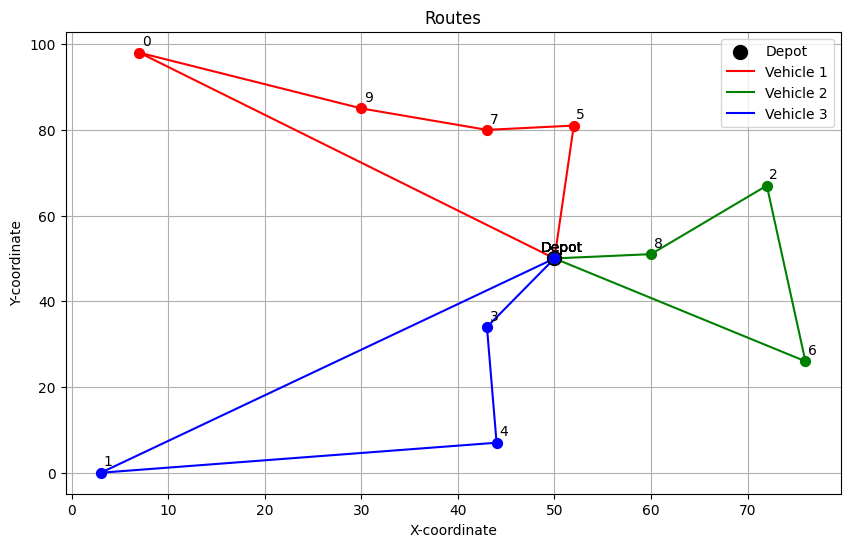

In [204]:
!pip install deap matplotlib
from deap import base, tools, creator
def main():
  random.seed(42)
  pop=toolbox.population(n=300)
  hof=tools.HallOfFame(1)
  stats=tools.Statistics(lambda ind:ind.fitness.values)
  stats.register("avg",np.mean)
  stats.register("min",np.min)
  algorithms.eaSimple(pop,toolbox,0.7,0.2,30,stats=stats,halloffame=hof)
  plot_routes(hof[0])
  return pop,stats,hof
if __name__=="__main__":
  main()

In [205]:
!pip install deap matplotlib